<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Image_Analysis_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 A Multimodal Image-Prompting Demonstration Notebook

- This notebook demonstrates:

- Image captioning

- Object detection

- OCR extraction

- Scene analysis

- JSON-structured output

- Prompt engineering for images

- Multimodal comparisons between AI models

Table of Contents

1. Setup

2. Utility Functions

3. Upload & Display Images

4. Image Captioning

5. Object Detection

6. OCR Text Extraction

7. Scene Analysis (Detailed)

8. Generate Structured JSON Output

9. Compare Models Side-by-Side

10. Batch Image Processing (Optional)

11. Screenshot Capture & Saving

# --- Step 2: Setup ---

In [1]:
!pip install google-generativeai pillow --quiet

import google.generativeai as genai
from PIL import Image
import io
from google.colab import files

# Pick the latest multimodal model
model = genai.GenerativeModel("gemini-2.5-flash-image")

✔ What this does

- Installs required libraries

- Sets up Gemini multimodal

- Makes sure the model supports images

- Defines a common model variable for the entire notebook

In [2]:
#prompt to safely input API key
import getpass
genai.configure(api_key=getpass.getpass("Enter your Gemini API key: "))

Enter your Gemini API key: ··········


# --- Step 3: Image Upload & Query Helpers ---

In [3]:
from google.colab import files

def upload_image():
    """
    Lets the user upload one image from local disk.
    Returns a PIL image object.
    """
    uploaded = files.upload()
    file_name = next(iter(uploaded.keys()))
    return Image.open(io.BytesIO(uploaded[file_name]))


def ask_gemini_about_image(image, prompt):
    """
    Sends an image + a text prompt to Gemini.
    Returns the model's response text.
    """
    response = model.generate_content([prompt, image])
    return response.text


✔ What these do

- upload_image() → opens a file picker in Colab and returns the image

- ask_gemini_about_image(image, prompt) → sends image + text to Gemini for multimodal analysis

# --- Step 4: Interactive Image Analysis UI ---

This creates a clean little interface:

- Upload an image

- Type a question

- Click a button

- See Gemini’s response

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widgets
upload_button = widgets.Button(
    description="Upload Image",
    button_style='info'
)

prompt_input = widgets.Textarea(
    placeholder="Ask something about the image...",
    description="Prompt:",
    layout=widgets.Layout(width='80%', height='80px')
)

run_button = widgets.Button(
    description="Analyze Image",
    button_style='success'
)

output_area = widgets.Output()
image_area = widgets.Output()

# State
uploaded_image = {"img": None}

def on_upload_clicked(b):
    with image_area:
        clear_output()
        img = upload_image()
        uploaded_image["img"] = img
        display(img)

def on_run_clicked(b):
    with output_area:
        clear_output()
        img = uploaded_image["img"]
        if img is None:
            print("⚠️ Please upload an image first.")
            return

        prompt = prompt_input.value.strip()
        if not prompt:
            print("⚠️ Please enter a prompt.")
            return

        print("⏳ Processing...")
        response = ask_gemini_about_image(img, prompt)
        clear_output()
        print("📌 Gemini Response:\n")
        print(response)

# Hook events
upload_button.on_click(on_upload_clicked)
run_button.on_click(on_run_clicked)

# Display UI
display(upload_button, image_area, prompt_input, run_button, output_area)


✔ When this cell is working properly:

- Click Upload Image → image appears

- Type a question → click Analyze Image

- Gemini responds in the output box

# --- Step 5: Screenshot Helper (Optional) ---

In [5]:
import os
from IPython.display import Image as ColabImage, display, Markdown

# Ensure screenshots folder exists
os.makedirs("/content/screenshots", exist_ok=True)

def show_screenshot(filename, caption=None):
    path = f"/content/screenshots/{filename}"
    if not os.path.exists(path):
        print(f"⚠️ Screenshot not found: {path}")
        return
    display(Markdown(f"### {caption or filename}"))
    display(ColabImage(path))

print("Screenshot helper ready. Place images in /content/screenshots/")


Screenshot helper ready. Place images in /content/screenshots/


✔ What it does

- Makes sure /content/screenshots/ always exists

- Lets you easily display screenshots like:

### Step 4: Interactive Image Analysis UI - Part 1

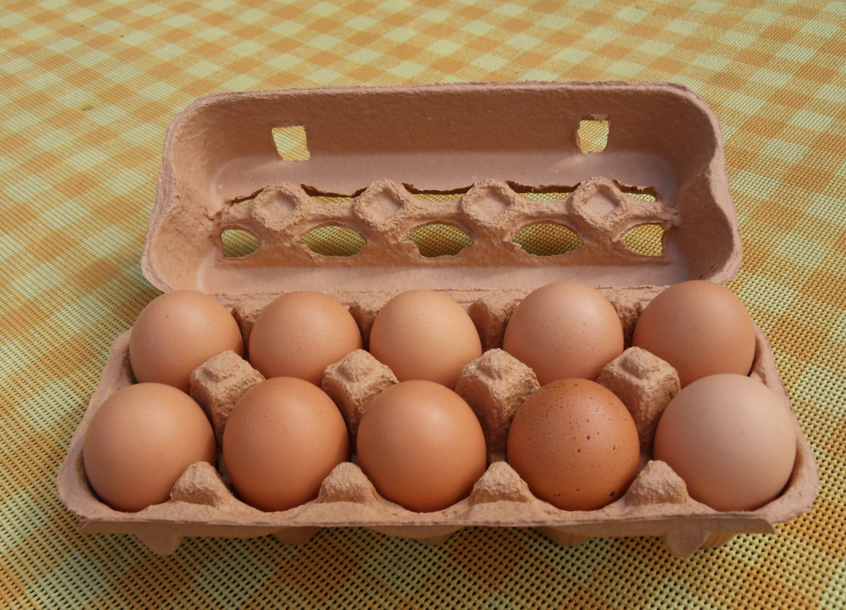

### Step 4: Interactive Image Analysis UI - Part 2

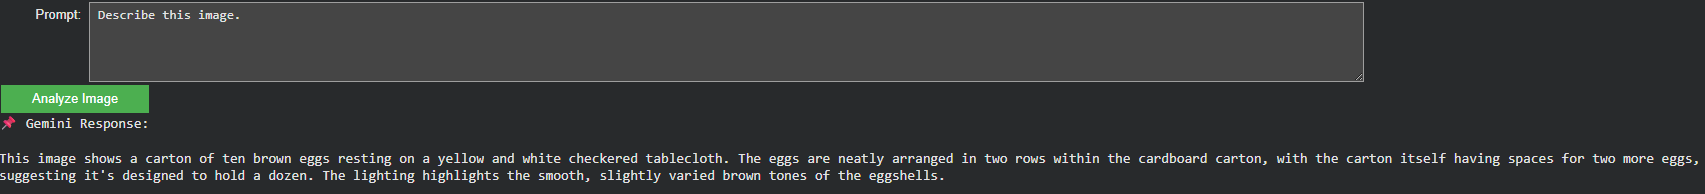

In [7]:
show_screenshot("Interactive Imagine Analysis UI.1.png", "Step 4: Interactive Image Analysis UI - Part 1")
show_screenshot("Interactive Imagine Analysis UI.2.png", "Step 4: Interactive Image Analysis UI - Part 2")